## Our Mission ##

Intelligence and Security Informatics is one of the major applications of Machine Learning in the interwebs today. Pretty much all of  have Intelligence and Security Informatics systems built in and automatically classify such mail as 'Junk Mail'. 

In this mission we will be using the Naive Bayes algorithm to create a model that can classify [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) SMS messages as spam or not spam, based on the training we give to the model. It is important to have some level of intuition as to what a spammy text message might look like. Usually they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. To the recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!

Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam' and nothing else. Also, this is a supervised learning problem, as we will be feeding a labelled dataset into the model, that it can learn from, to make future predictions. 

### Step 0: Introduction to the Naive Bayes Theorem ###

Bayes theorem is one of the earliest probabilistic inference algorithms developed by Reverend Bayes (which he used to try and infer the existence of God no less) and still performs extremely well for certain use cases. 

It's best to understand this theorem using an example. Let's say you are a member of the Secret Service and you have been deployed to protect the Democratic presidential nominee during one of his/her campaign speeches. Being a public event that is open to all, your job is not easy and you have to be on the constant lookout for threats. So one place to start is to put a certain threat-factor for each person. So based on the features of an individual, like the age, sex, and other smaller factors like is the person carrying a bag?, does the person look nervous? etc. you can make a judgement call as to if that person is viable threat. 

If an individual ticks all the boxes up to a level where it crosses a threshold of doubt in your mind, you can take action and remove that person from the vicinity. The Bayes theorem works in the same way as we are computing the probability of an event(a person being a threat) based on the probabilities of certain related events(age, sex, presence of bag or not, nervousness etc. of the person). 

One thing to consider is the independence of these features amongst each other. For example if a child looks nervous at the event then the likelihood of that person being a threat is not as much as say if it was a grown man who was nervous. To break this down a bit further, here there are two features we are considering, age AND nervousness. Say we look at these features individually, we could design a model that flags ALL persons that are nervous as potential threats. However, it is likely that we will have a lot of false positives as there is a strong chance that minors present at the event will be nervous. Hence by considering the age of a person along with the 'nervousness' feature we would definitely get a more accurate result as to who are potential threats and who aren't. 

This is the 'Naive' bit of the theorem where it considers each feature to be independent of each other which may not always be the case and hence that can affect the final judgement.

In short, the Bayes theorem calculates the probability of a certain event happening(in our case, a message being  spam) based on the joint probabilistic distributions of certain other events(in our case, a message being classified as spam). We will dive into the workings of the Bayes theorem later in the mission, but first, let us understand the data we are going to work with.

### Step 1.1: Understanding our dataset ### 


We will be using a [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) from the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. The direct data link is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/).


 ** Here's a preview of the data: ** 

<img src="images/dqnb.png" height="1242" width="1242">

The columns in the data set are currently not named and as you can see, there are 2 columns. 

The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam. 

The second column is the text content of the SMS message that is being classified.

>** Instructions: **
* Import the dataset into a pandas dataframe using the read_table method. Because this is a tab separated dataset we will be using '\t' as the value for the 'sep' argument which specifies this format. 
* Also, rename the column names by specifying a list ['label, 'sms_message'] to the 'names' argument of read_table().
* Print the first five values of the dataframe with the new column names.

In [1]:
import pandas as pd
import os 
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('C:/Users/SPEED TAIL/Desktop/STUDENTSECURITY')
#df = pd.read_table('fff.txt',delimiter=",", encoding='utf-8')
df = pd.read_csv('afghanForum.csv',error_bad_lines=False)
#data = pd.read_table('allsomaliforum.csv',sep='delimiter', error_bad_lines=False, sep='\t')
#result = pd.read_table('m.csv')
##df.rename(columns = {'v1':'label','v2':'sms'},inplace=True)
# Output printing out first 5 columns
df.head() 

b'Skipping line 38554: expected 12 fields, saw 16\nSkipping line 53649: expected 12 fields, saw 17\nSkipping line 54548: expected 12 fields, saw 20\n'


,MessageID,ThreadID,ThreadName,Date_Time,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
0,1000015,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 17:32:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,I don't like celebrity news but this needed to...,2009,3,14,2009-03-14 17:32:00.000,1000015
1,1000038,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 18:08:00,240,Filament\t\t\t\t\t\t\t\t\t\t\t,"Ew! ""Have courage for the great sorrows of lif...",2009,3,14,2009-03-14 18:08:00.000,1000015
2,1000069,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 19:15:00,988,~*~JiLk@Y~*~\t\t\t\t\t\t\t\t\t\t\t,"what? I am a traveler seeking the truth, a hum...",2009,3,14,2009-03-14 19:15:00.000,1000015
3,1000099,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 22:15:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,Well it is as good a time as any to throw the ...,2009,3,14,2009-03-14 22:15:00.000,1000015
4,1000132,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 22:38:00,240,Filament\t\t\t\t\t\t\t\t\t\t\t,"Ew X infinity. ""Have courage for the great sor...",2009,3,14,2009-03-14 22:38:00.000,1000015


In [ ]:
# Overview for the dataset and variables
pandas_profiling.ProfileReport(df)

### Step 1.2: Data Preprocessing ###



In [ ]:
df.describe

In [2]:
df.shape

(88032, 12)

In [3]:
# adding a column to represent the length of the tweet

df['len'] = df['Message'].str.len()
df.head(10)

,MessageID,ThreadID,ThreadName,Date_Time,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID,len
0,1000015,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 17:32:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,I don't like celebrity news but this needed to...,2009,3,14,2009-03-14 17:32:00.000,1000015,748
1,1000038,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 18:08:00,240,Filament\t\t\t\t\t\t\t\t\t\t\t,"Ew! ""Have courage for the great sorrows of lif...",2009,3,14,2009-03-14 18:08:00.000,1000015,191
2,1000069,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 19:15:00,988,~*~JiLk@Y~*~\t\t\t\t\t\t\t\t\t\t\t,"what? I am a traveler seeking the truth, a hum...",2009,3,14,2009-03-14 19:15:00.000,1000015,490
3,1000099,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 22:15:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,Well it is as good a time as any to throw the ...,2009,3,14,2009-03-14 22:15:00.000,1000015,359
4,1000132,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 22:38:00,240,Filament\t\t\t\t\t\t\t\t\t\t\t,"Ew X infinity. ""Have courage for the great sor...",2009,3,14,2009-03-14 22:38:00.000,1000015,202
5,1000168,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 23:44:00,988,~*~JiLk@Y~*~\t\t\t\t\t\t\t\t\t\t\t,What? x a million I am a traveler seeking the ...,2009,3,14,2009-03-14 23:44:00.000,1000015,502
6,1000186,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-15 01:46:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,"I guess we have an auction. ""Most people are o...",2009,3,15,2009-03-15 01:46:00.000,1000015,158
7,1000210,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-15 01:55:00,309,Batucci,lol @ his response. When is this product hitti...,2009,3,15,2009-03-15 01:55:00.000,1000015,103
8,100022,5556,Funny GIF's?,2009/03/17 00:00:00,269,afghan818\t\t\t\t\t\t\t\t\t\t\t,(Multimedia content),2009,3,17,2009-03-17 00:00:00.000,100022,20
9,1000329,5492,The Old Wishing Well,2009-03-09 11:17:00,1082,Kaleh-Khar\t\t\t\t\t\t\t\t\t\t\t,you've arrived at the WISHING WELL. Throw SOME...,2009,3,9,2009-03-09 11:17:00.000,1000329,542


In [4]:
# describing by len
df.groupby('len').describe() 

MessageID                                                      \
          count          mean            std        min         25%   
len                                                                   
1          49.0  1.509223e+06  672868.521328   397197.0  1008574.00   
2          36.0  1.634202e+06  847855.247362   447971.0   914317.25   
3         136.0  1.771013e+06  754802.085300   332238.0  1212506.00   
4          84.0  1.664923e+06  750670.331843   375043.0   988327.25   
5          81.0  1.752827e+06  808384.127242   333369.0   933039.00   
6          79.0  1.761624e+06  782426.026255   350000.0   985544.00   
7          93.0  1.606144e+06  816794.692404   352788.0   935314.00   
8          79.0  1.640358e+06  761233.746110   345713.0   877668.00   
9         129.0  1.654768e+06  746613.517421   335967.0  1091514.00   
10        123.0  1.732547e+06  738422.904971   361957.0  1157424.00   
11        123.0  1.508230e+06  749349.946655   329190.0   895557.00   
12        138.0  1.739895e+06  736296.663965   339565.0  1087351.25   
13        137.0  1.555737e+06  755705.354980   333298.0   895941.00   
14        170.0  1.641624e+06  739607.594337   345766.0  1082212.50   
15        149.0  1.654319e+06  716943.332362   343853.0  1064597.00   
16        160.0  1.537942e+06  777396.348329   339937.0   894046.50   
17        163.0  1.591381e+06  743971.483825   340760.0   930240.50   
18        161.0  1.496314e+06  776665.485738   340742.0   699694.00   
19        151.0  1.656199e+06  758658.665637   345312.0   964572.50   
20        191.0  1.256886e+06  841620.209143    30900.0   439578.50   
21        134.0  1.706276e+06  729537.514975   339953.0  1158792.25   
22        170.0  1.635089e+06  787306.409853   336629.0   891338.00   
23        141.0  1.580420e+06  750602.741076   329958.0   861212.00   
24        182.0  1.582075e+06  781444.039863   334106.0   893973.25   
25        167.0  1.622273e+06  750182.016538   339552.0  1031502.00   
26        169.0  1.627174e+06  773112.998182   330919.0   973511.00   
27        173.0  1.565591e+06  708171.302979   331857.0   990068.00   
28        131.0  1.570967e+06  788117.746127   352492.0   834256.50   
29        163.0  1.665003e+06  733719.832221   345054.0  1078208.50   
30        178.0  1.655798e+06  761860.763146   335957.0   987695.50   
...         ...           ...            ...        ...         ...   
20502       1.0  2.388041e+06            NaN  2388041.0  2388041.00   
20823       1.0  2.528615e+06            NaN  2528615.0  2528615.00   
21120       1.0  1.028021e+06            NaN  1028021.0  1028021.00   
21429       1.0  2.400825e+06            NaN  2400825.0  2400825.00   
21703       1.0  2.396193e+06            NaN  2396193.0  2396193.00   
21807       1.0  2.390687e+06            NaN  2390687.0  2390687.00   
22082       1.0  2.364713e+06            NaN  2364713.0  2364713.00   
22196       1.0  2.343299e+06            NaN  2343299.0  2343299.00   
22278       1.0  2.289451e+06            NaN  2289451.0  2289451.00   
22312       1.0  2.342040e+06            NaN  2342040.0  2342040.00   
23138       1.0  7.302740e+05            NaN   730274.0   730274.00   
23235       1.0  2.056326e+06            NaN  2056326.0  2056326.00   
23990       1.0  2.486673e+06            NaN  2486673.0  2486673.00   
24453       1.0  2.391856e+06            NaN  2391856.0  2391856.00   
25348       1.0  2.733692e+06            NaN  2733692.0  2733692.00   
27039       1.0  2.615014e+06            NaN  2615014.0  2615014.00   
27367       1.0  2.386709e+06            NaN  2386709.0  2386709.00   
27698       1.0  2.288784e+06            NaN  2288784.0  2288784.00   
30762       1.0  2.431251e+06            NaN  2431251.0  2431251.00   
33603       1.0  2.343268e+06            NaN  2343268.0  2343268.00   
33824       1.0  2.297738e+06            NaN  2297738.0  2297738.00   
34006       1.0  2.391812e+06            NaN  2391812.0  2391812.00   
34268       1.0  2.620444e+06 

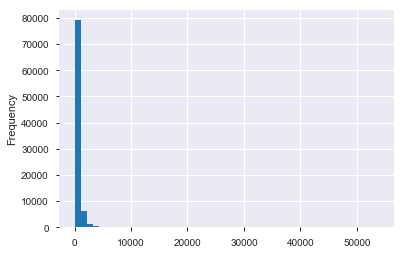

In [4]:
df['len'].plot(bins=50,kind='hist')


## checking the most common words in the whole dataset

In [ ]:
!pip install WordCloud

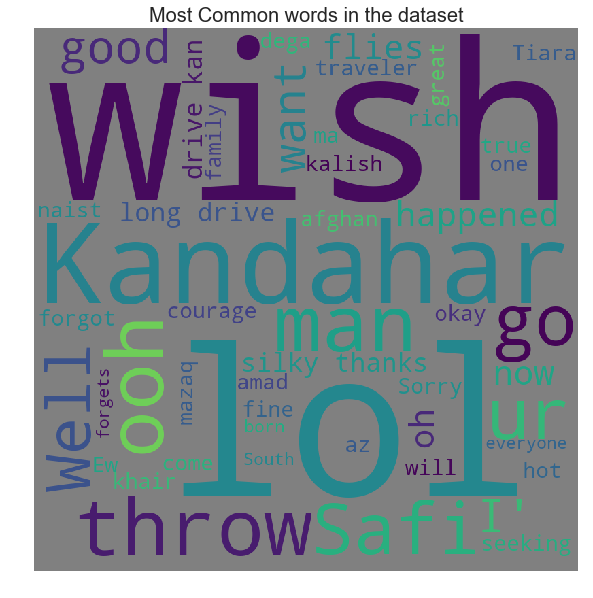

In [5]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'gray', width = 800, height = 800, max_words = 50).generate(str(df['Message']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Most Common words in the dataset', fontsize = 20)
plt.axis('off')
plt.imshow(wordcloud)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

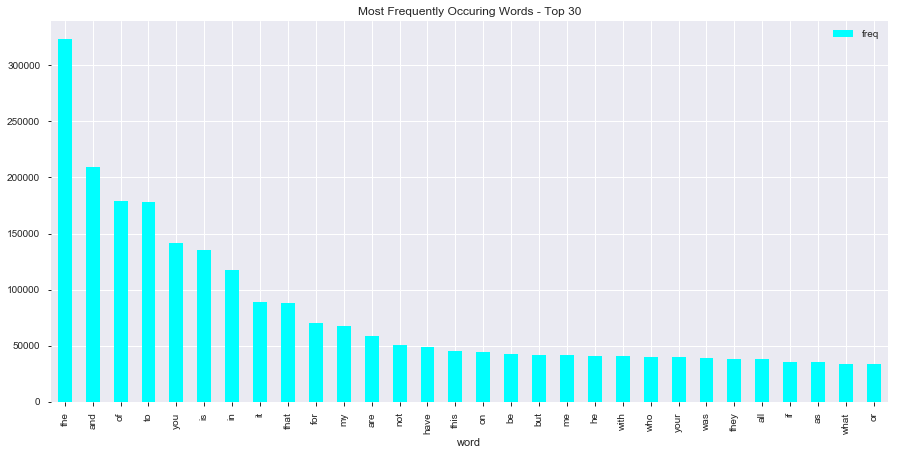

In [6]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
words = cv.fit_transform(df.Message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'Cyan')
plt.title("Most Frequently Occuring Words - Top 30")

In [7]:
import nltk
from nltk.corpus import stopwords

In [ ]:
!pip install textblob

In [8]:
from textblob import TextBlob
import pandas as pd
import re
import textblob

### Function to clean text and get sentiments from the text

In [9]:
def clean_text(text): 
        ''' 
        Utility function to clean text by removing links,
        special characters using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 

def get_text_sentiment(text):
    ''' 
    Utility function to classify sentiment of passed
    text using textblob's sentiment method 
    '''
    # create TextBlob object of passed text 
    analysis = TextBlob(clean_text(text)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'    

In [ ]:
##Check the working of the function
# BlobText 
checkOne = "resolution of tv is not good"
get_text_sentiment(checkOne)

In [10]:
#subset_sample['Reviews']
sentiment = []
for message in df['Message']:
    sentiment.append(get_text_sentiment(message))
    
df["Sentiment"] = sentiment
df.head()

,MessageID,ThreadID,ThreadName,Date_Time,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID,len,Sentiment
0,1000015,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 17:32:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,I don't like celebrity news but this needed to...,2009,3,14,2009-03-14 17:32:00.000,1000015,748,positive
1,1000038,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 18:08:00,240,Filament\t\t\t\t\t\t\t\t\t\t\t,"Ew! ""Have courage for the great sorrows of lif...",2009,3,14,2009-03-14 18:08:00.000,1000015,191,positive
2,1000069,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 19:15:00,988,~*~JiLk@Y~*~\t\t\t\t\t\t\t\t\t\t\t,"what? I am a traveler seeking the truth, a hum...",2009,3,14,2009-03-14 19:15:00.000,1000015,490,positive
3,1000099,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 22:15:00,339,Paradox\t\t\t\t\t\t\t\t\t\t\t,Well it is as good a time as any to throw the ...,2009,3,14,2009-03-14 22:15:00.000,1000015,359,positive
4,1000132,5536,Love Animals? Like George Clooney?Are hungry?,2009-03-14 22:38:00,240,Filament\t\t\t\t\t\t\t\t\t\t\t,"Ew X infinity. ""Have courage for the great sor...",2009,3,14,2009-03-14 22:38:00.000,1000015,202,positive


In [11]:
df['Sentiment_label'] = df.Sentiment.map({'positive':1, 'negative':-1,'neutral':0})

In [12]:
# describing by labels

df.groupby('Sentiment_label').describe()

MessageID                                                   \
                    count          mean            std       min       25%   
Sentiment_label                                                              
-1                14375.0  1.595836e+06  741657.523544  328271.0  976834.0   
 0                14675.0  1.640134e+06  774340.456023   30900.0  979028.0   
 1                58982.0  1.597440e+06  747607.942775  328391.0  947737.0   

                                                  ThreadID               ...  \
                       50%         75%        max    count         mean  ...   
Sentiment_label                                                          ...   
-1               1581287.0  2267563.00  2875820.0  14375.0  3297.294052  ...   
 0               1683790.0  2246416.50  2876051.0  14675.0  2989.886951  ...   
 1               1606938.0  2257084.25  2876010.0  58982.0  3288.789563  ...   

                ThreadFirstMessageID                 len              \
                                 75%        max    count        mean   
Sentiment_label                                                        
-1                         2262016.0  2875788.0  14375.0  451.207165   
 0                         2238498.0  2876051.0  14675.0  131.576763   
 1                         2250218.0  2876010.0  58982.0  610.299227   

                                                                 
                         std  min    25%    50%    75%      max  
Sentiment_label                                                  
-1                593.226091  4.0  141.0  276.0  543.0  17410.0  
 0                224.182997  1.0   40.0   87.0  173.0  17537.0  
 1               1162.998222  2.0  185.0  336.0  633.0  53901.0  

[3 rows x 64 columns]

In [ ]:
df.head()

## relation between spam messages and length

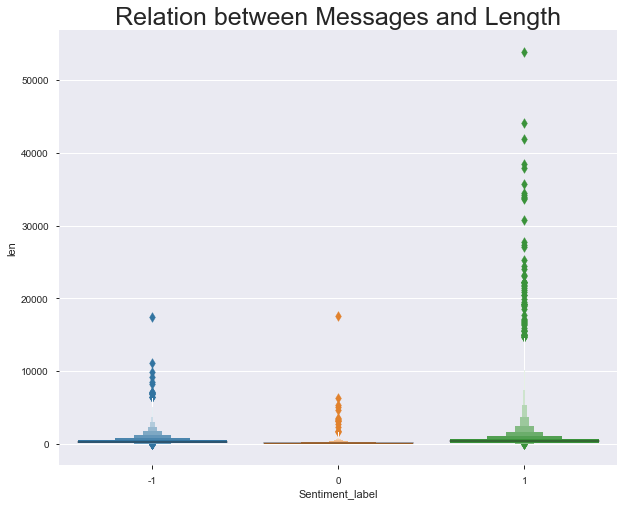

In [13]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.boxenplot(x = df['Sentiment_label'], y = df['len'])
plt.title('Relation between Messages and Length', fontsize = 25)
plt.show()

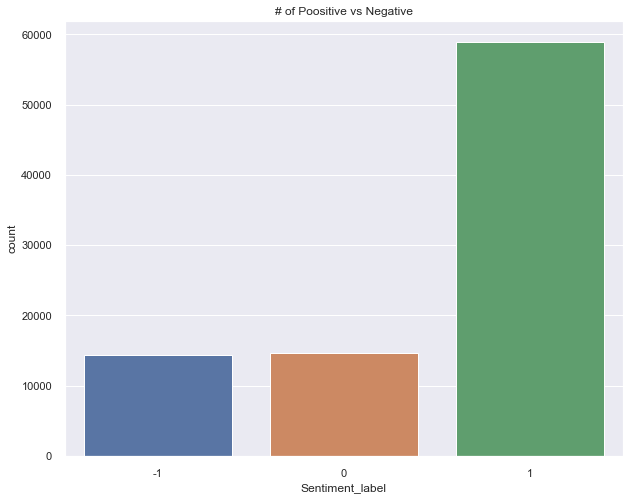

In [14]:
sns.set(style="darkgrid")
plt.title('# of Poositive vs Negative & Neutral')
sns.countplot(df['Sentiment_label'])

 ### Now lets try to find some distinguishing feature between the messages of two sets of labels - possitive and negative

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C2D099908>,
      dtype=object)

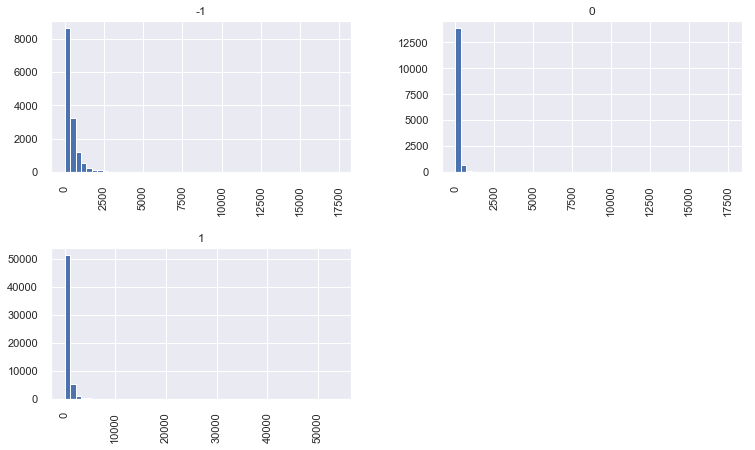

In [15]:
df.hist(column='len',by='Sentiment_label',bins=50,figsize=(12,7))

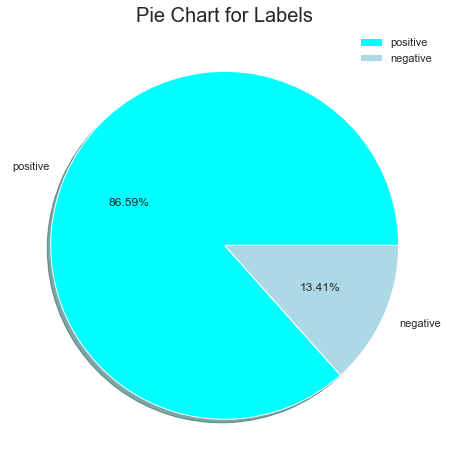

In [18]:
size = [4825, 747]
labels = ['positive', 'negative']
colors = ['Cyan', 'lightblue']

plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart for Labels', fontsize = 20)
plt.legend()
plt.show()

## checking the most common words in negative messages

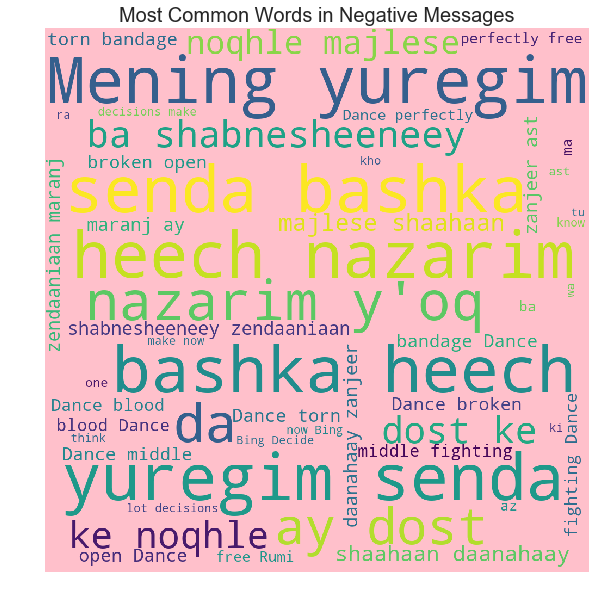

In [19]:
negative = ' '.join(text for text in df['Message'][df['Sentiment_label'] == 0])

wordcloud = WordCloud(background_color = 'pink', max_words = 50, height = 1000, width = 1000).generate(negative)

plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.title('Most Common Words in Negative Messages', fontsize = 20)
plt.imshow(wordcloud)

### checking the most common words in possitive messages

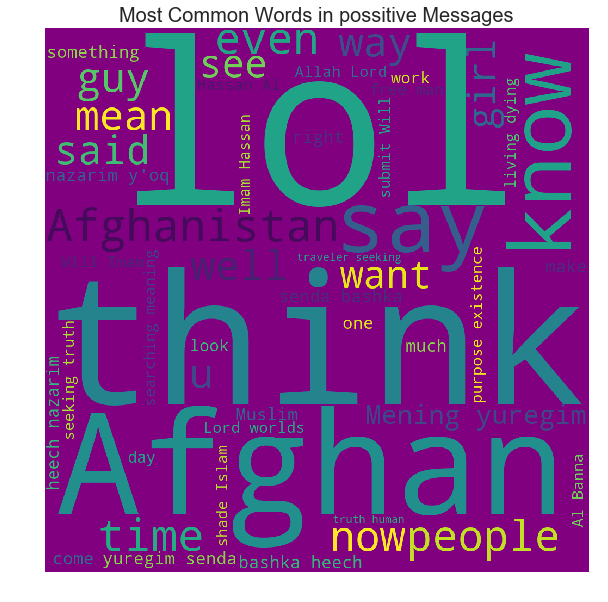

In [20]:
positive = ' '.join(text for text in df['Message'][df['Sentiment_label'] == 1])

wordcloud = WordCloud(background_color = 'purple', max_words = 50, height = 1000, width = 1000).generate(positive)

plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.title('Most Common Words in possitive Messages', fontsize = 20)
plt.imshow(wordcloud)

In [26]:
## data cleaning
df.isnull().sum() ##our data has no missing values

MessageID               0
ThreadID                0
ThreadName              0
Date_Time               0
MemberID                0
MemberName              0
Message                 0
P_Year                  0
P_Month                 0
P_Day                   0
P_Date                  0
ThreadFirstMessageID    0
len                     0
Sentiment               0
Sentiment_label         0
dtype: int64

#### Changing into lower letters

In [27]:
df['Message'] = [entry.lower() for entry in df['Message']]
df.head()

AttributeError: 'list' object has no attribute 'lower'

#### Removing punctation and doing word tokeninzer of content column

In [28]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['Message']= [tokenizer.tokenize(entry) for entry in df['Message']]


TypeError: expected string or bytes-like object

In [ ]:
df.head()

In [29]:
df['Message']=[" ".join(Message) for Message in df['Message'].values]

In [30]:
df['Message'].head()

0    i don t like celebrity news but this needed to...
1    ew have courage for the great sorrows of life ...
2    what i am a traveler seeking the truth a human...
3    well it is as good a time as any to throw the ...
4    ew x infinity have courage for the great sorro...
Name: Message, dtype: object

 #### Removing stopwords

In [31]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
#df['Message'] = [w for w in df['Message'] if not w in stop]
df.head(2)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
Y=df["Sentiment_label"]

### Step 3.1: Training and testing sets ###

Now that we have understood how to deal with the Bag of Words problem we can get back to our dataset and proceed with our analysis. Our first step in this regard would be to split our dataset into a training and testing set so we can test our model later.

In [34]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Message'],Y,test_size=0.3)

In [35]:
print(Train_X.shape,Test_X.shape,Train_Y.shape,Test_Y.shape)

(61622,) (26410,) (61622,) (26410,)


In [36]:
Tfidf_vect = TfidfVectorizer(stop_words='english')
Train_X_Tfidf = Tfidf_vect.fit_transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#### Applying CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
print(count_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [38]:
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(Train_X) 

In [39]:
# Transform the test set 
count_test = count_vectorizer.transform(Test_X)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(Train_X) 

# Transform the test set 
count_test = count_vectorizer.transform(Test_X)

In [41]:
print(Train_X_Tfidf.shape,Test_X_Tfidf.shape,count_train.shape,count_test.shape)

(61622, 118077) (26410, 118077) (61622, 118077) (26410, 118077)


In [42]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
predictions_NB = Naive.predict(Test_X_Tfidf)

In [44]:
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  68.64066641423703


In [45]:
print(classification_report(Test_Y, predictions_NB))

              precision    recall  f1-score   support

          -1       0.81      0.01      0.01      4346
           0       0.66      0.15      0.24      4357
           1       0.69      0.99      0.81     17707

   micro avg       0.69      0.69      0.69     26410
   macro avg       0.72      0.38      0.35     26410
weighted avg       0.70      0.69      0.58     26410



In [46]:
confusion_matrix(Test_Y, predictions_NB)

array([[   22,    93,  4231],
       [    2,   640,  3715],
       [    3,   238, 17466]], dtype=int64)

In [47]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(count_train,Train_Y)
predictions1_NB = Naive.predict(count_test)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions1_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  71.73419159409315


In [48]:
print(classification_report(Test_Y, predictions1_NB))

              precision    recall  f1-score   support

          -1       0.56      0.38      0.46      4346
           0       0.53      0.43      0.48      4357
           1       0.77      0.87      0.82     17707

   micro avg       0.72      0.72      0.72     26410
   macro avg       0.62      0.56      0.58     26410
weighted avg       0.70      0.72      0.70     26410



In [49]:
confusion_matrix(Test_Y, predictions1_NB)

array([[ 1672,   323,  2351],
       [  323,  1893,  2141],
       [  985,  1342, 15380]], dtype=int64)

#### SVM on count vecotizer data

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(count_train,Train_Y)

In [ ]:
predictions_SVM = SVM.predict(count_test)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

In [ ]:
print(classification_report(Test_Y, predictions_SVM))

In [ ]:
confusion_matrix(Test_Y, predictions_SVM)

#### SVM on TFIDF vecotizer data

In [ ]:
SVM1 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM1.fit(Train_X_Tfidf,Train_Y)

In [ ]:
predictions_SVM1= SVM1.predict(Test_X_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM1, Test_Y)*100)

In [ ]:
print(classification_report(Test_Y, predictions_SVM1))

In [ ]:
confusion_matrix(Test_Y, predictions_SVM1)

#### Random Forest model on count vecotizer data


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(count_train,Train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
predictions_rf = rf.predict(count_test)

print("Random Forest Accuracy Score -> ",accuracy_score(predictions_rf, Test_Y)*100)

Random Forest Accuracy Score ->  67.04657326770163


In [52]:
print(classification_report(Test_Y, predictions_rf))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      4346
           0       0.00      0.00      0.00      4357
           1       0.67      1.00      0.80     17707

   micro avg       0.67      0.67      0.67     26410
   macro avg       0.22      0.33      0.27     26410
weighted avg       0.45      0.67      0.54     26410



C:\Apps\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
confusion_matrix(Test_Y, predictions_rf)

array([[    0,     0,  4346],
       [    0,     0,  4357],
       [    0,     0, 17707]], dtype=int64)

#### Random forest model on TFIDF vecotizer data

In [54]:
rf1= RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf1.fit(Train_X_Tfidf,Train_Y)
predictions_rf1 = rf1.predict(Test_X_Tfidf)

print("Random Forest Accuracy Score -> ",accuracy_score(predictions_rf1, Test_Y)*100)


Random Forest Accuracy Score ->  67.04657326770163


In [55]:
print(classification_report(Test_Y, predictions_rf1))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      4346
           0       0.00      0.00      0.00      4357
           1       0.67      1.00      0.80     17707

   micro avg       0.67      0.67      0.67     26410
   macro avg       0.22      0.33      0.27     26410
weighted avg       0.45      0.67      0.54     26410



C:\Apps\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Apps\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
confusion_matrix(Test_Y, predictions_rf1)

array([[    0,     0,  4346],
       [    0,     0,  4357],
       [    0,     0, 17707]], dtype=int64)

#### Logistic Regression model on Count vecotizer data

In [57]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(count_train,Train_Y)
predictions_log= log.predict(count_test)

print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, Test_Y)*100)


C:\Apps\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Apps\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy Score ->  90.24990533888678


In [58]:
print(classification_report(Test_Y, predictions_log))

              precision    recall  f1-score   support

          -1       0.83      0.71      0.77      4346
           0       0.82      0.94      0.88      4357
           1       0.94      0.94      0.94     17707

   micro avg       0.90      0.90      0.90     26410
   macro avg       0.87      0.86      0.86     26410
weighted avg       0.90      0.90      0.90     26410



In [59]:
confusion_matrix(Test_Y, predictions_log)

array([[ 3080,   375,   891],
       [   68,  4091,   198],
       [  542,   501, 16664]], dtype=int64)

#### Logistic Regression model on TFIDF vecotizer data

In [60]:
log1=LogisticRegression(random_state=0)
log1.fit(Train_X_Tfidf,Train_Y)
predictions_log1= log1.predict(Test_X_Tfidf)

print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log1, Test_Y)*100)


Logistic Regression Accuracy Score ->  86.60355925785687


In [61]:
print(classification_report(Test_Y, predictions_log1))

              precision    recall  f1-score   support

          -1       0.89      0.51      0.64      4346
           0       0.80      0.85      0.82      4357
           1       0.88      0.96      0.92     17707

   micro avg       0.87      0.87      0.87     26410
   macro avg       0.85      0.77      0.79     26410
weighted avg       0.87      0.87      0.86     26410



In [62]:
confusion_matrix(Test_Y, predictions_log1)

array([[ 2199,   458,  1689],
       [   43,  3695,   619],
       [  237,   492, 16978]], dtype=int64)

#### Naive Bayes model on count vecotizer data

In [63]:
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], 
                                                    df['Sentiment_label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 88032
Number of rows in the training set: 66024
Number of rows in the test set: 22008


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vectorizer = CountVectorizer(stop_words='english')
print(count_vectorizer)

# Fit the training data and then return the matrix
training_data = count_vectorizer.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vectorizer.transform(X_test)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [65]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''

In [66]:
'''
Solution
'''
predictions = naive_bayes.predict(testing_data)

Now that predictions have been made on our test set, we need to check the accuracy of our predictions.

### Step 6: Evaluating our model ###

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, but first let's do quick recap of them.

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a score as close to 1 as possible is a good indicator of how well our model is doing.

In [ ]:
'''
Instructions:
Compute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions
you made earlier stored in the 'predictions' variable.
'''

In [68]:
'''
Solution
'''
from sklearn.metrics import accuracy_score
print('Accuracy score: ', format(accuracy_score(predictions, y_test)))


Accuracy score:  0.7141948382406398


In [69]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          -1       0.41      0.53      0.46      2688
           0       0.43      0.53      0.48      2985
           1       0.86      0.78      0.82     16335

   micro avg       0.71      0.71      0.71     22008
   macro avg       0.56      0.61      0.58     22008
weighted avg       0.75      0.71      0.73     22008



In [70]:
confusion_matrix(predictions, y_test)

array([[ 1429,   302,   957],
       [  266,  1590,  1129],
       [ 1827,  1809, 12699]], dtype=int64)

In [72]:
# Use random forest classifier for feature selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rfc.fit(training_data, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
predictionsrf = rfc.predict(testing_data)

print("Random Forest Accuracy Score -> ",accuracy_score(predictionsrf, y_test)*100)


Random Forest Accuracy Score ->  67.18011632133769


In [76]:
confusion_matrix(predictionsrf, y_test)

array([[    0,     0,     0],
       [    0,     0,     0],
       [ 3522,  3701, 14785]], dtype=int64)

In [88]:
!pip install xgboost

In [117]:
# Import the Classification modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [119]:
# Name the models to be used:
algorithms = [RandomForestClassifier(n_estimators=100), ExtraTreesClassifier(n_estimators=100), 
              GradientBoostingClassifier(n_estimators=100), XGBClassifier(n_estimators=100), 
               LogisticRegression(solver='lbfgs'),]
names = ['RFC', 'GBC', 'XGB', 'LoR']

In [120]:
# Use K-fold cross validation:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)

In [ ]:
for model, name in zip(algorithms, names):
    cv_results = cross_val_score(model, Train_X_Tfidf,Train_Y, scoring='accuracy', cv=kfold)
    print(name, "Mean:", cv_results.mean(), "; Std Dev:", cv_results.std())
    plt.bar(name, cv_results.mean())

### Step 7: Conclusion ###

One of the major advantages that logistic regression has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them. The other major advantage it has is its relative simplicity. Naive Bayes' works well right out of the box and tuning it's parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. 
It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle. All in all, logistic regression' really is a gem of an algorithm!